# Emerging Technology Assignment
### Daniel Gallagher | G00360986
***

#### The Brief
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

<b>Your submission must be in the form of a git repository containing, at a minimum, the following items:</b>

- Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.


- Python script that runs a web service based on the model, as above.


- Dockerfile to build and run the web service in a container.


- Standard items in a git repository such as a README. To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.
***

#### The Dataset
The dataset for this assignment was provided to us on Learnonline. This dataset contained different windspeeds and the power which they outputted. Below is a graph of what this dataset looked like to help visualize it.

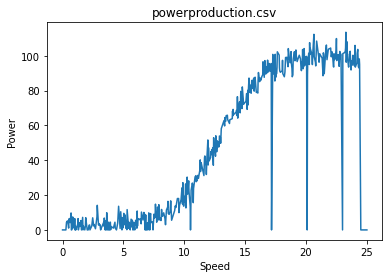

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset.
powerData = pd.read_csv("powerproduction.csv")
#Plotting the dataset.
plt.title('powerproduction.csv')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.plot(powerData.values[:,0], powerData.values[:,1]);

#### Graph Analysis.
It is clear from the graph that the power output is directly proportional to the wind speed in the area of the wind turbine. Also from this graph we see some outliers which will most certainly have a negative impact on our model as it will skew the data slightly. If these could be excluded it would lead to a more acurate model. An explanation for these outliers could be obstacles obstructing the turbine or could be down to wind direction or problems being encountered by the turbine itself.
***

#### My Test Model
After some research into the project and looking over past lab videos and studying the brief I began my model. The first model I started with was a simple model consisting of three layers. Two of these layers consisted of type "Sigmoid" and the final output layer consisted of type "Linear". Using this simple model helped me to get my head around the learning curve to the assignment and actually get to see a working output model allowing me to change and explore different layer types and how acurate the mixture of layers got. Using this model I got the loss down to a solid 140 which was okay but had alot of data fluctuation with this model.

#### My Actual Model
After exploring with this test model I moved onto my actual model using the knowledge I had now learned and seen first hand for myself. This is the final model I created which has good acuracy and is using a relatively low amount of epochs. The comments thorughout my model will acurately explain the code as you read down through it.

###### <u>Imports used in the model</u>
These lines of code show the imports used in the making of my model for this project.

In [2]:
#Imports which I used in this project
import tensorflow.keras as kr
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

###### <u>Reading in the CSV file</u>
This section shows the lines of code we used to read in the CSV file we obtained from Learnonline. This data set is called "powerData"

In [3]:
#Reads in our CSV file we got from learnonline.
powerData = pd.read_csv(
    "powerproduction.csv")

###### <u>Using numpy arrays</u>
This section of code is used to set the data into Numpy arrays.

In [4]:
#Sets the now imported data set into Numpy arrays.
x = powerData.iloc[:,0].values
y = powerData.iloc[:,1].values

xArray = np.array(x)
yArray = np.array(y)

###### <u>Layers</u>
This section of code is used to create the layers we use in the model. This model uses six layers of type 'Relu' and then has an output at the end of the code chunk.

In [5]:
#Layers used to make the model all of type 'Relu' (discussed further below)
krInput = kr.Input(shape=(1,))
layer1 = Dense(10, activation='relu')(krInput)
layer2 = Dense(50, activation='relu')(layer1)
layer3 = Dense(50, activation='relu')(layer2)
layer4 = Dense(50, activation='relu')(layer3)
layer5 = Dense(50, activation='relu')(layer4)
layer6 = Dense(50, activation='relu')(layer5)
output = Dense(1)(layer6)

###### <u>Compile</u>
This is where the model is compiled together.

In [6]:
#This now compiles the created model together.
model = Model(inputs=krInput, outputs=[output])

###### <u>Ending</u>
The last few lines consist of a few different parts. The adam optimizer is used along with displaying the loss once the code is run on each epoch.
Next the data is fitted and the epoch size used is specified along with the batch size you are looking to use. Lastly the model is saved and outputted as "Output_Model.h5" which is now our finished model. Output_Model.h5 can now be used to make future predictions.


In [7]:
#Uses adam optimizer and displays the loss when run.
model.compile(optimizer='adam', loss=['mean_squared_error'])

#This now fits the data arrays and speficies the epochs and batch size used.
model.fit(xArray, yArray,epochs=6000, batch_size=500)
model.predict([1.001])

#Saves model so it can be used for making predictions.
model.save("Output_Model.h5")

Epoch 1/6000
1/1 [==============================] - 0s 431ms/step - loss: 4079.7693
Epoch 2/6000
1/1 [==============================] - 0s 3ms/step - loss: 4023.3354
Epoch 3/6000
1/1 [==============================] - 0s 4ms/step - loss: 3972.5674
Epoch 4/6000
1/1 [==============================] - 0s 3ms/step - loss: 3926.6067
Epoch 5/6000
1/1 [==============================] - 0s 2ms/step - loss: 3888.4307
Epoch 6/6000
1/1 [==============================] - 0s 4ms/step - loss: 3850.9128
Epoch 7/6000
1/1 [==============================] - 0s 5ms/step - loss: 3807.7957
Epoch 8/6000
1/1 [==============================] - 0s 4ms/step - loss: 3759.7715
Epoch 9/6000
1/1 [==============================] - 0s 5ms/step - loss: 3709.1018
Epoch 10/6000
1/1 [==============================] - 0s 3ms/step - loss: 3659.2395
Epoch 11/6000
1/1 [==============================] - 0s 5ms/step - loss: 3608.1213
Epoch 12/6000
1/1 [==============================] - 0s 4ms/step - loss: 3552.7454
Epoch 13/60

1/1 [==============================] - 0s 5ms/step - loss: 520.3486
Epoch 101/6000
1/1 [==============================] - 0s 5ms/step - loss: 520.3009
Epoch 102/6000
1/1 [==============================] - 0s 6ms/step - loss: 520.1974
Epoch 103/6000
1/1 [==============================] - 0s 4ms/step - loss: 520.1161
Epoch 104/6000
1/1 [==============================] - 0s 3ms/step - loss: 519.9783
Epoch 105/6000
1/1 [==============================] - 0s 3ms/step - loss: 519.8104
Epoch 106/6000
1/1 [==============================] - 0s 5ms/step - loss: 519.6234
Epoch 107/6000
1/1 [==============================] - 0s 4ms/step - loss: 519.4313
Epoch 108/6000
1/1 [==============================] - 0s 4ms/step - loss: 519.2469
Epoch 109/6000
1/1 [==============================] - 0s 4ms/step - loss: 519.0791
Epoch 110/6000
1/1 [==============================] - 0s 6ms/step - loss: 518.9312
Epoch 111/6000
1/1 [==============================] - 0s 5ms/step - loss: 518.8007
Epoch 112/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 505.2868
Epoch 199/6000
1/1 [==============================] - 0s 3ms/step - loss: 505.1082
Epoch 200/6000
1/1 [==============================] - 0s 5ms/step - loss: 504.9291
Epoch 201/6000
1/1 [==============================] - 0s 5ms/step - loss: 504.7493
Epoch 202/6000
1/1 [==============================] - 0s 5ms/step - loss: 504.5690
Epoch 203/6000
1/1 [==============================] - 0s 4ms/step - loss: 504.3880
Epoch 204/6000
1/1 [==============================] - 0s 3ms/step - loss: 504.2060
Epoch 205/6000
1/1 [==============================] - 0s 4ms/step - loss: 504.0229
Epoch 206/6000
1/1 [==============================] - 0s 4ms/step - loss: 503.8366
Epoch 207/6000
1/1 [==============================] - 0s 4ms/step - loss: 503.5550
Epoch 208/6000
1/1 [==============================] - 0s 4ms/step - loss: 503.4054
Epoch 209/6000
1/1 [==============================] - 0s 4ms/step - loss: 503.2570
Epoch 210/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 473.7399
Epoch 297/6000
1/1 [==============================] - 0s 5ms/step - loss: 473.1395
Epoch 298/6000
1/1 [==============================] - 0s 3ms/step - loss: 472.5288
Epoch 299/6000
1/1 [==============================] - 0s 4ms/step - loss: 471.8784
Epoch 300/6000
1/1 [==============================] - 0s 4ms/step - loss: 471.2271
Epoch 301/6000
1/1 [==============================] - 0s 4ms/step - loss: 470.5416
Epoch 302/6000
1/1 [==============================] - 0s 4ms/step - loss: 469.8242
Epoch 303/6000
1/1 [==============================] - 0s 4ms/step - loss: 469.0287
Epoch 304/6000
1/1 [==============================] - 0s 3ms/step - loss: 468.2568
Epoch 305/6000
1/1 [==============================] - ETA: 0s - loss: 467.745 - 0s 6ms/step - loss: 467.7451
Epoch 306/6000
1/1 [==============================] - 0s 5ms/step - loss: 467.0037
Epoch 307/6000
1/1 [==============================] - 0s 4ms/step - loss: 46

1/1 [==============================] - 0s 3ms/step - loss: 409.7752
Epoch 395/6000
1/1 [==============================] - 0s 2ms/step - loss: 409.4361
Epoch 396/6000
1/1 [==============================] - 0s 4ms/step - loss: 409.2149
Epoch 397/6000
1/1 [==============================] - 0s 5ms/step - loss: 408.8143
Epoch 398/6000
1/1 [==============================] - 0s 4ms/step - loss: 408.4038
Epoch 399/6000
1/1 [==============================] - 0s 6ms/step - loss: 408.0707
Epoch 400/6000
1/1 [==============================] - 0s 5ms/step - loss: 407.7864
Epoch 401/6000
1/1 [==============================] - 0s 4ms/step - loss: 407.4646
Epoch 402/6000
1/1 [==============================] - 0s 4ms/step - loss: 407.0982
Epoch 403/6000
1/1 [==============================] - 0s 4ms/step - loss: 406.7579
Epoch 404/6000
1/1 [==============================] - 0s 5ms/step - loss: 406.3973
Epoch 405/6000
1/1 [==============================] - 0s 4ms/step - loss: 406.0254
Epoch 406/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 378.0067
Epoch 493/6000
1/1 [==============================] - 0s 3ms/step - loss: 377.6566
Epoch 494/6000
1/1 [==============================] - 0s 4ms/step - loss: 377.2993
Epoch 495/6000
1/1 [==============================] - 0s 4ms/step - loss: 376.9543
Epoch 496/6000
1/1 [==============================] - 0s 4ms/step - loss: 376.5985
Epoch 497/6000
1/1 [==============================] - 0s 3ms/step - loss: 376.2518
Epoch 498/6000
1/1 [==============================] - 0s 4ms/step - loss: 375.8771
Epoch 499/6000
1/1 [==============================] - 0s 4ms/step - loss: 375.5058
Epoch 500/6000
1/1 [==============================] - 0s 3ms/step - loss: 375.1339
Epoch 501/6000
1/1 [==============================] - 0s 4ms/step - loss: 374.7615
Epoch 502/6000
1/1 [==============================] - 0s 3ms/step - loss: 374.3963
Epoch 503/6000
1/1 [==============================] - 0s 4ms/step - loss: 374.0280
Epoch 504/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 299.6171
Epoch 591/6000
1/1 [==============================] - 0s 4ms/step - loss: 298.8606
Epoch 592/6000
1/1 [==============================] - 0s 5ms/step - loss: 299.5608
Epoch 593/6000
1/1 [==============================] - 0s 3ms/step - loss: 298.2748
Epoch 594/6000
1/1 [==============================] - 0s 5ms/step - loss: 294.8355
Epoch 595/6000
1/1 [==============================] - 0s 4ms/step - loss: 293.4596
Epoch 596/6000
1/1 [==============================] - 0s 4ms/step - loss: 293.9060
Epoch 597/6000
1/1 [==============================] - 0s 4ms/step - loss: 292.4026
Epoch 598/6000
1/1 [==============================] - 0s 5ms/step - loss: 289.5651
Epoch 599/6000
1/1 [==============================] - 0s 5ms/step - loss: 288.4300
Epoch 600/6000
1/1 [==============================] - 0s 5ms/step - loss: 288.2900
Epoch 601/6000
1/1 [==============================] - 0s 3ms/step - loss: 286.8231
Epoch 602/6000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 250.3510
Epoch 689/6000
1/1 [==============================] - 0s 3ms/step - loss: 244.1397
Epoch 690/6000
1/1 [==============================] - 0s 4ms/step - loss: 228.9068
Epoch 691/6000
1/1 [==============================] - 0s 3ms/step - loss: 233.9005
Epoch 692/6000
1/1 [==============================] - 0s 4ms/step - loss: 243.9155
Epoch 693/6000
1/1 [==============================] - 0s 4ms/step - loss: 231.9069
Epoch 694/6000
1/1 [==============================] - 0s 5ms/step - loss: 228.8609
Epoch 695/6000
1/1 [==============================] - 0s 5ms/step - loss: 237.6603
Epoch 696/6000
1/1 [==============================] - 0s 4ms/step - loss: 231.6092
Epoch 697/6000
1/1 [==============================] - 0s 4ms/step - loss: 227.0051
Epoch 698/6000
1/1 [==============================] - 0s 5ms/step - loss: 232.6316
Epoch 699/6000
1/1 [==============================] - 0s 7ms/step - loss: 230.0621
Epoch 700/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 213.2891
Epoch 787/6000
1/1 [==============================] - 0s 4ms/step - loss: 213.8790
Epoch 788/6000
1/1 [==============================] - 0s 3ms/step - loss: 214.5929
Epoch 789/6000
1/1 [==============================] - 0s 4ms/step - loss: 215.4863
Epoch 790/6000
1/1 [==============================] - 0s 5ms/step - loss: 215.6542
Epoch 791/6000
1/1 [==============================] - 0s 3ms/step - loss: 215.7124
Epoch 792/6000
1/1 [==============================] - 0s 4ms/step - loss: 214.3856
Epoch 793/6000
1/1 [==============================] - 0s 3ms/step - loss: 212.8965
Epoch 794/6000
1/1 [==============================] - 0s 3ms/step - loss: 211.6967
Epoch 795/6000
1/1 [==============================] - 0s 4ms/step - loss: 211.2109
Epoch 796/6000
1/1 [==============================] - 0s 4ms/step - loss: 211.3135
Epoch 797/6000
1/1 [==============================] - 0s 5ms/step - loss: 211.7784
Epoch 798/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 201.1842
Epoch 885/6000
1/1 [==============================] - 0s 5ms/step - loss: 201.0478
Epoch 886/6000
1/1 [==============================] - 0s 4ms/step - loss: 201.0164
Epoch 887/6000
1/1 [==============================] - 0s 4ms/step - loss: 200.9963
Epoch 888/6000
1/1 [==============================] - 0s 3ms/step - loss: 201.0770
Epoch 889/6000
1/1 [==============================] - 0s 32ms/step - loss: 201.2740
Epoch 890/6000
1/1 [==============================] - 0s 4ms/step - loss: 201.7115
Epoch 891/6000
1/1 [==============================] - 0s 5ms/step - loss: 202.5965
Epoch 892/6000
1/1 [==============================] - 0s 27ms/step - loss: 204.1104
Epoch 893/6000
1/1 [==============================] - 0s 4ms/step - loss: 207.5974
Epoch 894/6000
1/1 [==============================] - 0s 3ms/step - loss: 210.8332
Epoch 895/6000
1/1 [==============================] - 0s 3ms/step - loss: 217.5911
Epoch 896/6000
1/

1/1 [==============================] - 0s 4ms/step - loss: 192.3967
Epoch 983/6000
1/1 [==============================] - 0s 4ms/step - loss: 192.8691
Epoch 984/6000
1/1 [==============================] - 0s 3ms/step - loss: 192.7003
Epoch 985/6000
1/1 [==============================] - 0s 5ms/step - loss: 192.7598
Epoch 986/6000
1/1 [==============================] - 0s 4ms/step - loss: 192.2566
Epoch 987/6000
1/1 [==============================] - 0s 10ms/step - loss: 192.0213
Epoch 988/6000
1/1 [==============================] - 0s 9ms/step - loss: 191.4000
Epoch 989/6000
1/1 [==============================] - 0s 6ms/step - loss: 191.0403
Epoch 990/6000
1/1 [==============================] - 0s 7ms/step - loss: 190.6345
Epoch 991/6000
1/1 [==============================] - 0s 5ms/step - loss: 190.3762
Epoch 992/6000
1/1 [==============================] - 0s 4ms/step - loss: 190.1691
Epoch 993/6000
1/1 [==============================] - ETA: 0s - loss: 190.036 - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 4ms/step - loss: 189.5499
Epoch 1080/6000
1/1 [==============================] - 0s 4ms/step - loss: 185.4780
Epoch 1081/6000
1/1 [==============================] - 0s 4ms/step - loss: 183.0335
Epoch 1082/6000
1/1 [==============================] - 0s 3ms/step - loss: 182.9353
Epoch 1083/6000
1/1 [==============================] - 0s 3ms/step - loss: 184.5589
Epoch 1084/6000
1/1 [==============================] - 0s 3ms/step - loss: 186.3679
Epoch 1085/6000
1/1 [==============================] - 0s 3ms/step - loss: 185.8210
Epoch 1086/6000
1/1 [==============================] - 0s 3ms/step - loss: 184.6622
Epoch 1087/6000
1/1 [==============================] - 0s 3ms/step - loss: 182.9676
Epoch 1088/6000
1/1 [==============================] - 0s 3ms/step - loss: 182.2668
Epoch 1089/6000
1/1 [==============================] - 0s 3ms/step - loss: 182.6669
Epoch 1090/6000
1/1 [==============================] - 0s 3ms/step - loss: 183.4688
Epoch 10

1/1 [==============================] - 0s 3ms/step - loss: 181.6189
Epoch 1177/6000
1/1 [==============================] - 0s 3ms/step - loss: 179.5315
Epoch 1178/6000
1/1 [==============================] - 0s 3ms/step - loss: 177.6446
Epoch 1179/6000
1/1 [==============================] - 0s 3ms/step - loss: 177.1537
Epoch 1180/6000
1/1 [==============================] - 0s 3ms/step - loss: 177.5543
Epoch 1181/6000
1/1 [==============================] - 0s 2ms/step - loss: 178.4982
Epoch 1182/6000
1/1 [==============================] - 0s 4ms/step - loss: 179.0992
Epoch 1183/6000
1/1 [==============================] - 0s 4ms/step - loss: 178.9101
Epoch 1184/6000
1/1 [==============================] - 0s 3ms/step - loss: 177.7120
Epoch 1185/6000
1/1 [==============================] - 0s 2ms/step - loss: 177.0899
Epoch 1186/6000
1/1 [==============================] - 0s 2ms/step - loss: 176.6198
Epoch 1187/6000
1/1 [==============================] - 0s 3ms/step - loss: 176.6117
Epoch 11

1/1 [==============================] - 0s 2ms/step - loss: 178.3449
Epoch 1274/6000
1/1 [==============================] - 0s 3ms/step - loss: 179.9642
Epoch 1275/6000
1/1 [==============================] - 0s 4ms/step - loss: 176.4237
Epoch 1276/6000
1/1 [==============================] - 0s 3ms/step - loss: 173.7598
Epoch 1277/6000
1/1 [==============================] - 0s 3ms/step - loss: 172.5314
Epoch 1278/6000
1/1 [==============================] - 0s 3ms/step - loss: 175.2292
Epoch 1279/6000
1/1 [==============================] - 0s 3ms/step - loss: 173.1724
Epoch 1280/6000
1/1 [==============================] - 0s 3ms/step - loss: 172.9608
Epoch 1281/6000
1/1 [==============================] - 0s 2ms/step - loss: 174.1004
Epoch 1282/6000
1/1 [==============================] - 0s 4ms/step - loss: 175.6697
Epoch 1283/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.5502
Epoch 1284/6000
1/1 [==============================] - 0s 3ms/step - loss: 173.1476
Epoch 12

1/1 [==============================] - 0s 4ms/step - loss: 167.3929
Epoch 1371/6000
1/1 [==============================] - 0s 3ms/step - loss: 168.5174
Epoch 1372/6000
1/1 [==============================] - 0s 5ms/step - loss: 170.0681
Epoch 1373/6000
1/1 [==============================] - 0s 3ms/step - loss: 169.9814
Epoch 1374/6000
1/1 [==============================] - 0s 3ms/step - loss: 170.0908
Epoch 1375/6000
1/1 [==============================] - 0s 2ms/step - loss: 168.6415
Epoch 1376/6000
1/1 [==============================] - 0s 3ms/step - loss: 167.6369
Epoch 1377/6000
1/1 [==============================] - 0s 3ms/step - loss: 167.2046
Epoch 1378/6000
1/1 [==============================] - 0s 5ms/step - loss: 167.0730
Epoch 1379/6000
1/1 [==============================] - 0s 4ms/step - loss: 167.2621
Epoch 1380/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.0036
Epoch 1381/6000
1/1 [==============================] - 0s 3ms/step - loss: 170.2812
Epoch 13

1/1 [==============================] - 0s 5ms/step - loss: 162.4672
Epoch 1468/6000
1/1 [==============================] - 0s 5ms/step - loss: 162.6758
Epoch 1469/6000
1/1 [==============================] - 0s 5ms/step - loss: 163.8223
Epoch 1470/6000
1/1 [==============================] - 0s 3ms/step - loss: 166.5256
Epoch 1471/6000
1/1 [==============================] - 0s 5ms/step - loss: 167.4053
Epoch 1472/6000
1/1 [==============================] - 0s 6ms/step - loss: 167.9464
Epoch 1473/6000
1/1 [==============================] - 0s 5ms/step - loss: 165.3692
Epoch 1474/6000
1/1 [==============================] - 0s 5ms/step - loss: 163.7076
Epoch 1475/6000
1/1 [==============================] - 0s 3ms/step - loss: 162.3480
Epoch 1476/6000
1/1 [==============================] - 0s 5ms/step - loss: 163.0721
Epoch 1477/6000
1/1 [==============================] - 0s 4ms/step - loss: 165.3408
Epoch 1478/6000
1/1 [==============================] - 0s 5ms/step - loss: 166.4159
Epoch 14

1/1 [==============================] - 0s 3ms/step - loss: 162.6696
Epoch 1565/6000
1/1 [==============================] - 0s 3ms/step - loss: 164.3942
Epoch 1566/6000
1/1 [==============================] - 0s 4ms/step - loss: 165.5627
Epoch 1567/6000
1/1 [==============================] - 0s 3ms/step - loss: 162.6948
Epoch 1568/6000
1/1 [==============================] - 0s 4ms/step - loss: 160.0311
Epoch 1569/6000
1/1 [==============================] - 0s 5ms/step - loss: 157.8893
Epoch 1570/6000
1/1 [==============================] - 0s 3ms/step - loss: 157.2906
Epoch 1571/6000
1/1 [==============================] - 0s 5ms/step - loss: 158.2649
Epoch 1572/6000
1/1 [==============================] - 0s 3ms/step - loss: 160.2185
Epoch 1573/6000
1/1 [==============================] - 0s 4ms/step - loss: 162.1842
Epoch 1574/6000
1/1 [==============================] - 0s 6ms/step - loss: 162.3168
Epoch 1575/6000
1/1 [==============================] - 0s 5ms/step - loss: 161.8391
Epoch 15

1/1 [==============================] - 0s 3ms/step - loss: 167.2092
Epoch 1662/6000
1/1 [==============================] - 0s 3ms/step - loss: 164.5779
Epoch 1663/6000
1/1 [==============================] - 0s 3ms/step - loss: 164.5805
Epoch 1664/6000
1/1 [==============================] - 0s 4ms/step - loss: 157.1692
Epoch 1665/6000
1/1 [==============================] - 0s 3ms/step - loss: 154.1632
Epoch 1666/6000
1/1 [==============================] - 0s 4ms/step - loss: 151.6545
Epoch 1667/6000
1/1 [==============================] - 0s 3ms/step - loss: 151.4322
Epoch 1668/6000
1/1 [==============================] - 0s 4ms/step - loss: 152.8448
Epoch 1669/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.0161
Epoch 1670/6000
1/1 [==============================] - 0s 3ms/step - loss: 160.0360
Epoch 1671/6000
1/1 [==============================] - 0s 3ms/step - loss: 160.3218
Epoch 1672/6000
1/1 [==============================] - 0s 6ms/step - loss: 160.0305
Epoch 16

1/1 [==============================] - 0s 4ms/step - loss: 155.1163
Epoch 1759/6000
1/1 [==============================] - 0s 4ms/step - loss: 154.3394
Epoch 1760/6000
1/1 [==============================] - 0s 3ms/step - loss: 158.1684
Epoch 1761/6000
1/1 [==============================] - 0s 3ms/step - loss: 154.7427
Epoch 1762/6000
1/1 [==============================] - 0s 3ms/step - loss: 156.2353
Epoch 1763/6000
1/1 [==============================] - 0s 26ms/step - loss: 151.7458
Epoch 1764/6000
1/1 [==============================] - 0s 4ms/step - loss: 151.2578
Epoch 1765/6000
1/1 [==============================] - 0s 6ms/step - loss: 148.6537
Epoch 1766/6000
1/1 [==============================] - 0s 5ms/step - loss: 147.5661
Epoch 1767/6000
1/1 [==============================] - 0s 3ms/step - loss: 146.5644
Epoch 1768/6000
1/1 [==============================] - 0s 4ms/step - loss: 146.2200
Epoch 1769/6000
1/1 [==============================] - 0s 5ms/step - loss: 146.0262
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 166.3341
Epoch 1856/6000
1/1 [==============================] - 0s 3ms/step - loss: 151.6652
Epoch 1857/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.4029
Epoch 1858/6000
1/1 [==============================] - 0s 4ms/step - loss: 143.3902
Epoch 1859/6000
1/1 [==============================] - 0s 3ms/step - loss: 142.0928
Epoch 1860/6000
1/1 [==============================] - 0s 3ms/step - loss: 142.3135
Epoch 1861/6000
1/1 [==============================] - 0s 3ms/step - loss: 143.0555
Epoch 1862/6000
1/1 [==============================] - 0s 4ms/step - loss: 144.6689
Epoch 1863/6000
1/1 [==============================] - 0s 4ms/step - loss: 145.7940
Epoch 1864/6000
1/1 [==============================] - 0s 7ms/step - loss: 148.9873
Epoch 1865/6000
1/1 [==============================] - 0s 4ms/step - loss: 149.2127
Epoch 1866/6000
1/1 [==============================] - 0s 4ms/step - loss: 154.8160
Epoch 18

1/1 [==============================] - 0s 4ms/step - loss: 157.0055
Epoch 1953/6000
1/1 [==============================] - 0s 9ms/step - loss: 149.4999
Epoch 1954/6000
1/1 [==============================] - 0s 5ms/step - loss: 145.1230
Epoch 1955/6000
1/1 [==============================] - 0s 7ms/step - loss: 139.8634
Epoch 1956/6000
1/1 [==============================] - 0s 5ms/step - loss: 138.4304
Epoch 1957/6000
1/1 [==============================] - 0s 4ms/step - loss: 139.7631
Epoch 1958/6000
1/1 [==============================] - 0s 5ms/step - loss: 142.9850
Epoch 1959/6000
1/1 [==============================] - 0s 4ms/step - loss: 148.3928
Epoch 1960/6000
1/1 [==============================] - 0s 4ms/step - loss: 146.5587
Epoch 1961/6000
1/1 [==============================] - 0s 4ms/step - loss: 145.8676
Epoch 1962/6000
1/1 [==============================] - 0s 3ms/step - loss: 141.7088
Epoch 1963/6000
1/1 [==============================] - 0s 3ms/step - loss: 140.0808
Epoch 19

1/1 [==============================] - 0s 3ms/step - loss: 136.0211
Epoch 2050/6000
1/1 [==============================] - 0s 7ms/step - loss: 136.5139
Epoch 2051/6000
1/1 [==============================] - 0s 4ms/step - loss: 137.1312
Epoch 2052/6000
1/1 [==============================] - 0s 3ms/step - loss: 136.8934
Epoch 2053/6000
1/1 [==============================] - 0s 4ms/step - loss: 136.8508
Epoch 2054/6000
1/1 [==============================] - 0s 4ms/step - loss: 136.3278
Epoch 2055/6000
1/1 [==============================] - 0s 4ms/step - loss: 135.8803
Epoch 2056/6000
1/1 [==============================] - 0s 5ms/step - loss: 135.3614
Epoch 2057/6000
1/1 [==============================] - 0s 5ms/step - loss: 134.8408
Epoch 2058/6000
1/1 [==============================] - 0s 4ms/step - loss: 134.5167
Epoch 2059/6000
1/1 [==============================] - 0s 5ms/step - loss: 134.1635
Epoch 2060/6000
1/1 [==============================] - 0s 3ms/step - loss: 134.0287
Epoch 20

1/1 [==============================] - 0s 3ms/step - loss: 136.8749
Epoch 2147/6000
1/1 [==============================] - 0s 3ms/step - loss: 137.2437
Epoch 2148/6000
1/1 [==============================] - 0s 3ms/step - loss: 134.9619
Epoch 2149/6000
1/1 [==============================] - 0s 3ms/step - loss: 133.9605
Epoch 2150/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.6187
Epoch 2151/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.0359
Epoch 2152/6000
1/1 [==============================] - 0s 4ms/step - loss: 131.4884
Epoch 2153/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.3146
Epoch 2154/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.1776
Epoch 2155/6000
1/1 [==============================] - 0s 2ms/step - loss: 131.2030
Epoch 2156/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.2853
Epoch 2157/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.6899
Epoch 21

1/1 [==============================] - 0s 4ms/step - loss: 136.4315
Epoch 2244/6000
1/1 [==============================] - 0s 5ms/step - loss: 143.0111
Epoch 2245/6000
1/1 [==============================] - 0s 4ms/step - loss: 141.3717
Epoch 2246/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.9010
Epoch 2247/6000
1/1 [==============================] - 0s 3ms/step - loss: 141.4839
Epoch 2248/6000
1/1 [==============================] - 0s 4ms/step - loss: 142.2392
Epoch 2249/6000
1/1 [==============================] - 0s 2ms/step - loss: 135.1474
Epoch 2250/6000
1/1 [==============================] - 0s 4ms/step - loss: 132.6903
Epoch 2251/6000
1/1 [==============================] - 0s 3ms/step - loss: 129.3621
Epoch 2252/6000
1/1 [==============================] - 0s 4ms/step - loss: 128.0987
Epoch 2253/6000
1/1 [==============================] - 0s 3ms/step - loss: 127.3775
Epoch 2254/6000
1/1 [==============================] - 0s 5ms/step - loss: 127.1891
Epoch 22

1/1 [==============================] - 0s 7ms/step - loss: 124.6320
Epoch 2340/6000
1/1 [==============================] - 0s 5ms/step - loss: 124.8174
Epoch 2341/6000
1/1 [==============================] - 0s 9ms/step - loss: 125.2117
Epoch 2342/6000
1/1 [==============================] - 0s 4ms/step - loss: 125.5604
Epoch 2343/6000
1/1 [==============================] - 0s 4ms/step - loss: 126.2663
Epoch 2344/6000
1/1 [==============================] - 0s 3ms/step - loss: 126.4480
Epoch 2345/6000
1/1 [==============================] - 0s 4ms/step - loss: 127.3577
Epoch 2346/6000
1/1 [==============================] - 0s 4ms/step - loss: 127.3513
Epoch 2347/6000
1/1 [==============================] - 0s 3ms/step - loss: 128.4521
Epoch 2348/6000
1/1 [==============================] - 0s 4ms/step - loss: 128.2009
Epoch 2349/6000
1/1 [==============================] - 0s 2ms/step - loss: 129.8366
Epoch 2350/6000
1/1 [==============================] - 0s 7ms/step - loss: 129.4866
Epoch 23

1/1 [==============================] - 0s 4ms/step - loss: 122.5100
Epoch 2437/6000
1/1 [==============================] - 0s 4ms/step - loss: 123.2420
Epoch 2438/6000
1/1 [==============================] - 0s 4ms/step - loss: 123.9107
Epoch 2439/6000
1/1 [==============================] - 0s 3ms/step - loss: 123.8308
Epoch 2440/6000
1/1 [==============================] - 0s 5ms/step - loss: 124.0758
Epoch 2441/6000
1/1 [==============================] - 0s 4ms/step - loss: 123.4619
Epoch 2442/6000
1/1 [==============================] - 0s 3ms/step - loss: 123.1642
Epoch 2443/6000
1/1 [==============================] - 0s 4ms/step - loss: 122.5128
Epoch 2444/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.0091
Epoch 2445/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.6861
Epoch 2446/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.6312
Epoch 2447/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.7760
Epoch 24

1/1 [==============================] - 0s 3ms/step - loss: 129.7141
Epoch 2534/6000
1/1 [==============================] - 0s 3ms/step - loss: 124.0014
Epoch 2535/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.7393
Epoch 2536/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.0228
Epoch 2537/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.2295
Epoch 2538/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.2152
Epoch 2539/6000
1/1 [==============================] - 0s 5ms/step - loss: 119.7724
Epoch 2540/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.6958
Epoch 2541/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.5800
Epoch 2542/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.8531
Epoch 2543/6000
1/1 [==============================] - 0s 3ms/step - loss: 123.1506
Epoch 2544/6000
1/1 [==============================] - 0s 2ms/step - loss: 124.6777
Epoch 25

1/1 [==============================] - 0s 4ms/step - loss: 124.8061
Epoch 2631/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.4314
Epoch 2632/6000
1/1 [==============================] - 0s 4ms/step - loss: 133.9955
Epoch 2633/6000
1/1 [==============================] - 0s 4ms/step - loss: 148.9703
Epoch 2634/6000
1/1 [==============================] - 0s 5ms/step - loss: 139.4148
Epoch 2635/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.8515
Epoch 2636/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.1969
Epoch 2637/6000
1/1 [==============================] - 0s 4ms/step - loss: 127.4986
Epoch 2638/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.8933
Epoch 2639/6000
1/1 [==============================] - 0s 5ms/step - loss: 117.9677
Epoch 2640/6000
1/1 [==============================] - 0s 4ms/step - loss: 116.7162
Epoch 2641/6000
1/1 [==============================] - 0s 4ms/step - loss: 116.6785
Epoch 26

1/1 [==============================] - 0s 10ms/step - loss: 115.3510
Epoch 2728/6000
1/1 [==============================] - 0s 8ms/step - loss: 115.6312
Epoch 2729/6000
1/1 [==============================] - 0s 5ms/step - loss: 116.2585
Epoch 2730/6000
1/1 [==============================] - 0s 4ms/step - loss: 116.9480
Epoch 2731/6000
1/1 [==============================] - 0s 4ms/step - loss: 118.8548
Epoch 2732/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.5785
Epoch 2733/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.2513
Epoch 2734/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.8877
Epoch 2735/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.4148
Epoch 2736/6000
1/1 [==============================] - 0s 3ms/step - loss: 127.9277
Epoch 2737/6000
1/1 [==============================] - 0s 3ms/step - loss: 130.8728
Epoch 2738/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.0173
Epoch 2

1/1 [==============================] - 0s 4ms/step - loss: 116.4783
Epoch 2825/6000
1/1 [==============================] - 0s 3ms/step - loss: 118.1429
Epoch 2826/6000
1/1 [==============================] - 0s 5ms/step - loss: 118.2020
Epoch 2827/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.4947
Epoch 2828/6000
1/1 [==============================] - 0s 5ms/step - loss: 120.0462
Epoch 2829/6000
1/1 [==============================] - 0s 6ms/step - loss: 122.5060
Epoch 2830/6000
1/1 [==============================] - 0s 6ms/step - loss: 121.3333
Epoch 2831/6000
1/1 [==============================] - 0s 8ms/step - loss: 122.9958
Epoch 2832/6000
1/1 [==============================] - 0s 6ms/step - loss: 120.7500
Epoch 2833/6000
1/1 [==============================] - 0s 5ms/step - loss: 121.3097
Epoch 2834/6000
1/1 [==============================] - 0s 3ms/step - loss: 118.3443
Epoch 2835/6000
1/1 [==============================] - 0s 5ms/step - loss: 117.7998
Epoch 28

1/1 [==============================] - 0s 4ms/step - loss: 122.1694
Epoch 2922/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.4340
Epoch 2923/6000
1/1 [==============================] - 0s 4ms/step - loss: 121.9862
Epoch 2924/6000
1/1 [==============================] - 0s 4ms/step - loss: 118.6393
Epoch 2925/6000
1/1 [==============================] - 0s 5ms/step - loss: 118.1636
Epoch 2926/6000
1/1 [==============================] - 0s 6ms/step - loss: 115.6049
Epoch 2927/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.1531
Epoch 2928/6000
1/1 [==============================] - 0s 5ms/step - loss: 113.4782
Epoch 2929/6000
1/1 [==============================] - 0s 5ms/step - loss: 113.1375
Epoch 2930/6000
1/1 [==============================] - 0s 3ms/step - loss: 112.4656
Epoch 2931/6000
1/1 [==============================] - 0s 4ms/step - loss: 112.6721
Epoch 2932/6000
1/1 [==============================] - 0s 3ms/step - loss: 112.6133
Epoch 29

1/1 [==============================] - 0s 4ms/step - loss: 111.0150
Epoch 3019/6000
1/1 [==============================] - 0s 4ms/step - loss: 111.0195
Epoch 3020/6000
1/1 [==============================] - 0s 4ms/step - loss: 110.7381
Epoch 3021/6000
1/1 [==============================] - 0s 4ms/step - loss: 111.2670
Epoch 3022/6000
1/1 [==============================] - 0s 4ms/step - loss: 111.4040
Epoch 3023/6000
1/1 [==============================] - 0s 3ms/step - loss: 112.7679
Epoch 3024/6000
1/1 [==============================] - 0s 4ms/step - loss: 113.1710
Epoch 3025/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.6206
Epoch 3026/6000
1/1 [==============================] - 0s 3ms/step - loss: 116.6235
Epoch 3027/6000
1/1 [==============================] - 0s 3ms/step - loss: 121.0168
Epoch 3028/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.3453
Epoch 3029/6000
1/1 [==============================] - 0s 4ms/step - loss: 121.6233
Epoch 30

1/1 [==============================] - 0s 5ms/step - loss: 108.0332
Epoch 3116/6000
1/1 [==============================] - 0s 3ms/step - loss: 108.2351
Epoch 3117/6000
1/1 [==============================] - 0s 3ms/step - loss: 108.9283
Epoch 3118/6000
1/1 [==============================] - 0s 5ms/step - loss: 109.4012
Epoch 3119/6000
1/1 [==============================] - 0s 4ms/step - loss: 111.1324
Epoch 3120/6000
1/1 [==============================] - 0s 3ms/step - loss: 111.9233
Epoch 3121/6000
1/1 [==============================] - 0s 2ms/step - loss: 114.9485
Epoch 3122/6000
1/1 [==============================] - 0s 4ms/step - loss: 115.6428
Epoch 3123/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.4467
Epoch 3124/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.0605
Epoch 3125/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.4137
Epoch 3126/6000
1/1 [==============================] - 0s 4ms/step - loss: 117.7516
Epoch 31

1/1 [==============================] - 0s 6ms/step - loss: 116.0176
Epoch 3213/6000
1/1 [==============================] - 0s 5ms/step - loss: 111.3778
Epoch 3214/6000
1/1 [==============================] - 0s 7ms/step - loss: 109.9615
Epoch 3215/6000
1/1 [==============================] - 0s 5ms/step - loss: 108.2920
Epoch 3216/6000
1/1 [==============================] - 0s 6ms/step - loss: 107.7622
Epoch 3217/6000
1/1 [==============================] - 0s 5ms/step - loss: 106.7984
Epoch 3218/6000
1/1 [==============================] - 0s 5ms/step - loss: 106.3369
Epoch 3219/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.8809
Epoch 3220/6000
1/1 [==============================] - 0s 4ms/step - loss: 105.7643
Epoch 3221/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.6626
Epoch 3222/6000
1/1 [==============================] - 0s 4ms/step - loss: 105.7421
Epoch 3223/6000
1/1 [==============================] - 0s 4ms/step - loss: 105.8326
Epoch 32

1/1 [==============================] - 0s 3ms/step - loss: 113.4493
Epoch 3310/6000
1/1 [==============================] - 0s 4ms/step - loss: 108.3736
Epoch 3311/6000
1/1 [==============================] - 0s 6ms/step - loss: 106.1864
Epoch 3312/6000
1/1 [==============================] - 0s 6ms/step - loss: 104.7469
Epoch 3313/6000
1/1 [==============================] - 0s 4ms/step - loss: 103.9846
Epoch 3314/6000
1/1 [==============================] - 0s 6ms/step - loss: 103.7553
Epoch 3315/6000
1/1 [==============================] - 0s 6ms/step - loss: 103.9856
Epoch 3316/6000
1/1 [==============================] - 0s 5ms/step - loss: 104.5555
Epoch 3317/6000
1/1 [==============================] - 0s 5ms/step - loss: 105.1440
Epoch 3318/6000
1/1 [==============================] - 0s 5ms/step - loss: 106.1459
Epoch 3319/6000
1/1 [==============================] - 0s 4ms/step - loss: 107.3876
Epoch 3320/6000
1/1 [==============================] - 0s 5ms/step - loss: 110.0998
Epoch 33

1/1 [==============================] - 0s 5ms/step - loss: 208.6565
Epoch 3407/6000
1/1 [==============================] - 0s 3ms/step - loss: 208.3694
Epoch 3408/6000
1/1 [==============================] - 0s 3ms/step - loss: 208.0527
Epoch 3409/6000
1/1 [==============================] - 0s 4ms/step - loss: 207.7531
Epoch 3410/6000
1/1 [==============================] - 0s 5ms/step - loss: 207.4359
Epoch 3411/6000
1/1 [==============================] - 0s 4ms/step - loss: 207.1564
Epoch 3412/6000
1/1 [==============================] - 0s 6ms/step - loss: 206.8803
Epoch 3413/6000
1/1 [==============================] - 0s 5ms/step - loss: 206.6026
Epoch 3414/6000
1/1 [==============================] - 0s 5ms/step - loss: 206.3420
Epoch 3415/6000
1/1 [==============================] - 0s 6ms/step - loss: 206.0967
Epoch 3416/6000
1/1 [==============================] - 0s 5ms/step - loss: 205.8722
Epoch 3417/6000
1/1 [==============================] - 0s 8ms/step - loss: 205.6345
Epoch 34

1/1 [==============================] - 0s 5ms/step - loss: 192.4509
Epoch 3504/6000
1/1 [==============================] - 0s 2ms/step - loss: 192.3402
Epoch 3505/6000
1/1 [==============================] - 0s 3ms/step - loss: 192.2368
Epoch 3506/6000
1/1 [==============================] - 0s 4ms/step - loss: 192.1297
Epoch 3507/6000
1/1 [==============================] - 0s 4ms/step - loss: 192.0157
Epoch 3508/6000
1/1 [==============================] - 0s 3ms/step - loss: 191.9077
Epoch 3509/6000
1/1 [==============================] - 0s 3ms/step - loss: 191.8088
Epoch 3510/6000
1/1 [==============================] - 0s 4ms/step - loss: 191.7098
Epoch 3511/6000
1/1 [==============================] - 0s 5ms/step - loss: 191.6062
Epoch 3512/6000
1/1 [==============================] - 0s 4ms/step - loss: 191.5036
Epoch 3513/6000
1/1 [==============================] - 0s 3ms/step - loss: 191.4060
Epoch 3514/6000
1/1 [==============================] - 0s 3ms/step - loss: 191.3099
Epoch 35

1/1 [==============================] - 0s 3ms/step - loss: 181.7509
Epoch 3601/6000
1/1 [==============================] - 0s 5ms/step - loss: 181.6458
Epoch 3602/6000
1/1 [==============================] - 0s 3ms/step - loss: 181.5346
Epoch 3603/6000
1/1 [==============================] - 0s 4ms/step - loss: 181.4117
Epoch 3604/6000
1/1 [==============================] - 0s 3ms/step - loss: 181.3576
Epoch 3605/6000
1/1 [==============================] - 0s 4ms/step - loss: 181.2951
Epoch 3606/6000
1/1 [==============================] - 0s 4ms/step - loss: 181.2166
Epoch 3607/6000
1/1 [==============================] - 0s 6ms/step - loss: 181.1276
Epoch 3608/6000
1/1 [==============================] - 0s 5ms/step - loss: 181.0294
Epoch 3609/6000
1/1 [==============================] - 0s 3ms/step - loss: 180.9207
Epoch 3610/6000
1/1 [==============================] - 0s 3ms/step - loss: 180.8034
Epoch 3611/6000
1/1 [==============================] - 0s 3ms/step - loss: 180.7284
Epoch 36

1/1 [==============================] - 0s 4ms/step - loss: 174.7678
Epoch 3698/6000
1/1 [==============================] - 0s 5ms/step - loss: 174.7188
Epoch 3699/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.6570
Epoch 3700/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.5837
Epoch 3701/6000
1/1 [==============================] - 0s 5ms/step - loss: 174.5045
Epoch 3702/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.4312
Epoch 3703/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.3868
Epoch 3704/6000
1/1 [==============================] - 0s 6ms/step - loss: 174.3272
Epoch 3705/6000
1/1 [==============================] - 0s 4ms/step - loss: 174.2471
Epoch 3706/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.1843
Epoch 3707/6000
1/1 [==============================] - 0s 4ms/step - loss: 174.1174
Epoch 3708/6000
1/1 [==============================] - 0s 4ms/step - loss: 174.0529
Epoch 37

1/1 [==============================] - 0s 2ms/step - loss: 168.8674
Epoch 3795/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.7937
Epoch 3796/6000
1/1 [==============================] - 0s 5ms/step - loss: 168.7639
Epoch 3797/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.7588
Epoch 3798/6000
1/1 [==============================] - 0s 3ms/step - loss: 168.7605
Epoch 3799/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.7469
Epoch 3800/6000
1/1 [==============================] - 0s 5ms/step - loss: 168.7068
Epoch 3801/6000
1/1 [==============================] - 0s 6ms/step - loss: 168.6397
Epoch 3802/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.5579
Epoch 3803/6000
1/1 [==============================] - 0s 5ms/step - loss: 168.4681
Epoch 3804/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.3802
Epoch 3805/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.3006
Epoch 38

1/1 [==============================] - 0s 3ms/step - loss: 165.4630
Epoch 3892/6000
1/1 [==============================] - 0s 3ms/step - loss: 165.3943
Epoch 3893/6000
1/1 [==============================] - 0s 5ms/step - loss: 165.2710
Epoch 3894/6000
1/1 [==============================] - 0s 4ms/step - loss: 165.1076
Epoch 3895/6000
1/1 [==============================] - 0s 4ms/step - loss: 164.9097
Epoch 3896/6000
1/1 [==============================] - 0s 3ms/step - loss: 164.7038
Epoch 3897/6000
1/1 [==============================] - 0s 5ms/step - loss: 164.4965
Epoch 3898/6000
1/1 [==============================] - 0s 4ms/step - loss: 164.3279
Epoch 3899/6000
1/1 [==============================] - 0s 5ms/step - loss: 164.1625
Epoch 3900/6000
1/1 [==============================] - 0s 5ms/step - loss: 164.0268
Epoch 3901/6000
1/1 [==============================] - 0s 6ms/step - loss: 163.9182
Epoch 3902/6000
1/1 [==============================] - 0s 6ms/step - loss: 163.8373
Epoch 39

1/1 [==============================] - 0s 4ms/step - loss: 160.4096
Epoch 3989/6000
1/1 [==============================] - 0s 5ms/step - loss: 160.3650
Epoch 3990/6000
1/1 [==============================] - 0s 4ms/step - loss: 160.3251
Epoch 3991/6000
1/1 [==============================] - ETA: 0s - loss: 160.288 - 0s 4ms/step - loss: 160.2887
Epoch 3992/6000
1/1 [==============================] - 0s 3ms/step - loss: 160.2545
Epoch 3993/6000
1/1 [==============================] - 0s 5ms/step - loss: 160.2207
Epoch 3994/6000
1/1 [==============================] - 0s 6ms/step - loss: 160.1847
Epoch 3995/6000
1/1 [==============================] - 0s 5ms/step - loss: 160.1462
Epoch 3996/6000
1/1 [==============================] - 0s 4ms/step - loss: 160.1048
Epoch 3997/6000
1/1 [==============================] - 0s 6ms/step - loss: 160.0632
Epoch 3998/6000
1/1 [==============================] - 0s 4ms/step - loss: 160.0238
Epoch 3999/6000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 5ms/step - loss: 155.8635
Epoch 4086/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.6772
Epoch 4087/6000
1/1 [==============================] - 0s 3ms/step - loss: 155.6704
Epoch 4088/6000
1/1 [==============================] - 0s 6ms/step - loss: 155.7721
Epoch 4089/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.7530
Epoch 4090/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.6019
Epoch 4091/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.4666
Epoch 4092/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.4400
Epoch 4093/6000
1/1 [==============================] - 0s 5ms/step - loss: 155.4638
Epoch 4094/6000
1/1 [==============================] - 0s 4ms/step - loss: 155.4277
Epoch 4095/6000
1/1 [==============================] - 0s 5ms/step - loss: 155.3338
Epoch 4096/6000
1/1 [==============================] - 0s 3ms/step - loss: 155.2615
Epoch 40

1/1 [==============================] - 0s 4ms/step - loss: 152.1047
Epoch 4183/6000
1/1 [==============================] - 0s 4ms/step - loss: 152.2433
Epoch 4184/6000
1/1 [==============================] - 0s 3ms/step - loss: 152.4280
Epoch 4185/6000
1/1 [==============================] - 0s 5ms/step - loss: 152.7291
Epoch 4186/6000
1/1 [==============================] - 0s 2ms/step - loss: 153.0507
Epoch 4187/6000
1/1 [==============================] - 0s 3ms/step - loss: 153.5525
Epoch 4188/6000
1/1 [==============================] - 0s 3ms/step - loss: 154.1067
Epoch 4189/6000
1/1 [==============================] - 0s 6ms/step - loss: 154.8654
Epoch 4190/6000
1/1 [==============================] - 0s 5ms/step - loss: 155.6949
Epoch 4191/6000
1/1 [==============================] - 0s 4ms/step - loss: 156.6752
Epoch 4192/6000
1/1 [==============================] - 0s 9ms/step - loss: 157.4228
Epoch 4193/6000
1/1 [==============================] - 0s 4ms/step - loss: 158.2834
Epoch 41

1/1 [==============================] - 0s 4ms/step - loss: 148.3225
Epoch 4280/6000
1/1 [==============================] - 0s 4ms/step - loss: 148.1046
Epoch 4281/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.9465
Epoch 4282/6000
1/1 [==============================] - 0s 4ms/step - loss: 147.8555
Epoch 4283/6000
1/1 [==============================] - 0s 5ms/step - loss: 147.8196
Epoch 4284/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.8186
Epoch 4285/6000
1/1 [==============================] - 0s 4ms/step - loss: 147.8371
Epoch 4286/6000
1/1 [==============================] - 0s 5ms/step - loss: 147.8682
Epoch 4287/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.9055
Epoch 4288/6000
1/1 [==============================] - 0s 4ms/step - loss: 147.9516
Epoch 4289/6000
1/1 [==============================] - 0s 3ms/step - loss: 147.9899
Epoch 4290/6000
1/1 [==============================] - 0s 6ms/step - loss: 148.0210
Epoch 42

1/1 [==============================] - 0s 5ms/step - loss: 143.4657
Epoch 4376/6000
1/1 [==============================] - 0s 4ms/step - loss: 143.5444
Epoch 4377/6000
1/1 [==============================] - 0s 4ms/step - loss: 143.6737
Epoch 4378/6000
1/1 [==============================] - 0s 2ms/step - loss: 143.9175
Epoch 4379/6000
1/1 [==============================] - 0s 3ms/step - loss: 144.2917
Epoch 4380/6000
1/1 [==============================] - 0s 4ms/step - loss: 144.9028
Epoch 4381/6000
1/1 [==============================] - 0s 11ms/step - loss: 146.2464
Epoch 4382/6000
1/1 [==============================] - 0s 4ms/step - loss: 148.3355
Epoch 4383/6000
1/1 [==============================] - 0s 3ms/step - loss: 152.5445
Epoch 4384/6000
1/1 [==============================] - 0s 4ms/step - loss: 157.5904
Epoch 4385/6000
1/1 [==============================] - 0s 4ms/step - loss: 166.1379
Epoch 4386/6000
1/1 [==============================] - 0s 5ms/step - loss: 170.6369
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 139.5581
Epoch 4473/6000
1/1 [==============================] - 0s 5ms/step - loss: 139.6176
Epoch 4474/6000
1/1 [==============================] - ETA: 0s - loss: 139.787 - 0s 5ms/step - loss: 139.7876
Epoch 4475/6000
1/1 [==============================] - 0s 3ms/step - loss: 139.9882
Epoch 4476/6000
1/1 [==============================] - 0s 4ms/step - loss: 140.3794
Epoch 4477/6000
1/1 [==============================] - 0s 5ms/step - loss: 140.7973
Epoch 4478/6000
1/1 [==============================] - 0s 5ms/step - loss: 141.5183
Epoch 4479/6000
1/1 [==============================] - 0s 5ms/step - loss: 142.1080
Epoch 4480/6000
1/1 [==============================] - 0s 4ms/step - loss: 142.7711
Epoch 4481/6000
1/1 [==============================] - 0s 5ms/step - loss: 143.1858
Epoch 4482/6000
1/1 [==============================] - 0s 4ms/step - loss: 143.9834
Epoch 4483/6000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 136.9830
Epoch 4569/6000
1/1 [==============================] - 0s 4ms/step - loss: 137.1686
Epoch 4570/6000
1/1 [==============================] - 0s 6ms/step - loss: 137.3466
Epoch 4571/6000
1/1 [==============================] - 0s 3ms/step - loss: 137.4353
Epoch 4572/6000
1/1 [==============================] - 0s 5ms/step - loss: 137.5461
Epoch 4573/6000
1/1 [==============================] - 0s 4ms/step - loss: 137.5692
Epoch 4574/6000
1/1 [==============================] - 0s 4ms/step - loss: 137.6343
Epoch 4575/6000
1/1 [==============================] - 0s 4ms/step - loss: 137.6430
Epoch 4576/6000
1/1 [==============================] - 0s 3ms/step - loss: 137.7138
Epoch 4577/6000
1/1 [==============================] - 0s 3ms/step - loss: 137.6236
Epoch 4578/6000
1/1 [==============================] - 0s 3ms/step - loss: 137.5939
Epoch 4579/6000
1/1 [==============================] - 0s 5ms/step - loss: 137.4252
Epoch 45

1/1 [==============================] - 0s 2ms/step - loss: 132.8175
Epoch 4666/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.5905
Epoch 4667/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.3671
Epoch 4668/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.1452
Epoch 4669/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.9921
Epoch 4670/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.9442
Epoch 4671/6000
1/1 [==============================] - 0s 4ms/step - loss: 131.9726
Epoch 4672/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.0246
Epoch 4673/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.0485
Epoch 4674/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.0308
Epoch 4675/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.9507
Epoch 4676/6000
1/1 [==============================] - 0s 3ms/step - loss: 131.8450
Epoch 46

1/1 [==============================] - 0s 4ms/step - loss: 129.3600
Epoch 4763/6000
1/1 [==============================] - 0s 6ms/step - loss: 129.1451
Epoch 4764/6000
1/1 [==============================] - 0s 4ms/step - loss: 128.9750
Epoch 4765/6000
1/1 [==============================] - 0s 6ms/step - loss: 128.8296
Epoch 4766/6000
1/1 [==============================] - 0s 5ms/step - loss: 128.7255
Epoch 4767/6000
1/1 [==============================] - 0s 4ms/step - loss: 128.6402
Epoch 4768/6000
1/1 [==============================] - 0s 4ms/step - loss: 128.5813
Epoch 4769/6000
1/1 [==============================] - 0s 10ms/step - loss: 128.5343
Epoch 4770/6000
1/1 [==============================] - 0s 8ms/step - loss: 128.4859
Epoch 4771/6000
1/1 [==============================] - 0s 5ms/step - loss: 128.4473
Epoch 4772/6000
1/1 [==============================] - 0s 8ms/step - loss: 128.4050
Epoch 4773/6000
1/1 [==============================] - 0s 8ms/step - loss: 128.3673
Epoch 4

1/1 [==============================] - 0s 6ms/step - loss: 131.4711
Epoch 4860/6000
1/1 [==============================] - 0s 9ms/step - loss: 130.2117
Epoch 4861/6000
1/1 [==============================] - 0s 3ms/step - loss: 129.7874
Epoch 4862/6000
1/1 [==============================] - 0s 3ms/step - loss: 128.5650
Epoch 4863/6000
1/1 [==============================] - 0s 9ms/step - loss: 127.8912
Epoch 4864/6000
1/1 [==============================] - 0s 3ms/step - loss: 126.9206
Epoch 4865/6000
1/1 [==============================] - 0s 5ms/step - loss: 126.3084
Epoch 4866/6000
1/1 [==============================] - 0s 4ms/step - loss: 125.7858
Epoch 4867/6000
1/1 [==============================] - 0s 5ms/step - loss: 125.4863
Epoch 4868/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.2949
Epoch 4869/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.2204
Epoch 4870/6000
1/1 [==============================] - 0s 4ms/step - loss: 125.2426
Epoch 48

1/1 [==============================] - 0s 4ms/step - loss: 123.6397
Epoch 4957/6000
1/1 [==============================] - 0s 3ms/step - loss: 123.2503
Epoch 4958/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.9238
Epoch 4959/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.7386
Epoch 4960/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.5820
Epoch 4961/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.4657
Epoch 4962/6000
1/1 [==============================] - 0s 4ms/step - loss: 122.3808
Epoch 4963/6000
1/1 [==============================] - 0s 4ms/step - loss: 122.3331
Epoch 4964/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.3074
Epoch 4965/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.3200
Epoch 4966/6000
1/1 [==============================] - 0s 4ms/step - loss: 122.3661
Epoch 4967/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.4732
Epoch 49

1/1 [==============================] - 0s 2ms/step - loss: 130.6787
Epoch 5054/6000
1/1 [==============================] - 0s 3ms/step - loss: 134.9796
Epoch 5055/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.8638
Epoch 5056/6000
1/1 [==============================] - 0s 2ms/step - loss: 150.4834
Epoch 5057/6000
1/1 [==============================] - 0s 3ms/step - loss: 166.7093
Epoch 5058/6000
1/1 [==============================] - 0s 2ms/step - loss: 155.6237
Epoch 5059/6000
1/1 [==============================] - 0s 2ms/step - loss: 151.7973
Epoch 5060/6000
1/1 [==============================] - 0s 3ms/step - loss: 134.7055
Epoch 5061/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.8920
Epoch 5062/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.2845
Epoch 5063/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.5088
Epoch 5064/6000
1/1 [==============================] - 0s 3ms/step - loss: 124.6168
Epoch 50

1/1 [==============================] - 0s 3ms/step - loss: 124.2980
Epoch 5151/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.1058
Epoch 5152/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.2981
Epoch 5153/6000
1/1 [==============================] - 0s 2ms/step - loss: 122.6440
Epoch 5154/6000
1/1 [==============================] - 0s 4ms/step - loss: 120.3392
Epoch 5155/6000
1/1 [==============================] - 0s 2ms/step - loss: 118.1939
Epoch 5156/6000
1/1 [==============================] - 0s 3ms/step - loss: 117.2728
Epoch 5157/6000
1/1 [==============================] - 0s 3ms/step - loss: 117.5108
Epoch 5158/6000
1/1 [==============================] - 0s 3ms/step - loss: 118.4791
Epoch 5159/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.6146
Epoch 5160/6000
1/1 [==============================] - 0s 2ms/step - loss: 120.1466
Epoch 5161/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.3848
Epoch 51

1/1 [==============================] - 0s 3ms/step - loss: 118.0815
Epoch 5248/6000
1/1 [==============================] - 0s 3ms/step - loss: 117.9065
Epoch 5249/6000
1/1 [==============================] - 0s 4ms/step - loss: 117.2940
Epoch 5250/6000
1/1 [==============================] - 0s 2ms/step - loss: 116.8443
Epoch 5251/6000
1/1 [==============================] - 0s 3ms/step - loss: 116.2423
Epoch 5252/6000
1/1 [==============================] - 0s 4ms/step - loss: 115.7723
Epoch 5253/6000
1/1 [==============================] - 0s 2ms/step - loss: 115.3886
Epoch 5254/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.1060
Epoch 5255/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.9262
Epoch 5256/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.8278
Epoch 5257/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.7829
Epoch 5258/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.8023
Epoch 52

1/1 [==============================] - 0s 2ms/step - loss: 120.8342
Epoch 5345/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.1137
Epoch 5346/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.6198
Epoch 5347/6000
1/1 [==============================] - 0s 2ms/step - loss: 129.5542
Epoch 5348/6000
1/1 [==============================] - 0s 3ms/step - loss: 127.5354
Epoch 5349/6000
1/1 [==============================] - 0s 2ms/step - loss: 129.3334
Epoch 5350/6000
1/1 [==============================] - 0s 4ms/step - loss: 125.0636
Epoch 5351/6000
1/1 [==============================] - 0s 3ms/step - loss: 124.0196
Epoch 5352/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.5736
Epoch 5353/6000
1/1 [==============================] - 0s 3ms/step - loss: 117.4323
Epoch 5354/6000
1/1 [==============================] - 0s 2ms/step - loss: 115.1597
Epoch 5355/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.0123
Epoch 53

1/1 [==============================] - 0s 4ms/step - loss: 114.1556
Epoch 5442/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.2974
Epoch 5443/6000
1/1 [==============================] - 0s 3ms/step - loss: 113.9527
Epoch 5444/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.3498
Epoch 5445/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.2522
Epoch 5446/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.0729
Epoch 5447/6000
1/1 [==============================] - 0s 2ms/step - loss: 115.0198
Epoch 5448/6000
1/1 [==============================] - 0s 4ms/step - loss: 116.0833
Epoch 5449/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.9516
Epoch 5450/6000
1/1 [==============================] - 0s 2ms/step - loss: 117.2116
Epoch 5451/6000
1/1 [==============================] - 0s 3ms/step - loss: 117.0808
Epoch 5452/6000
1/1 [==============================] - 0s 3ms/step - loss: 118.6674
Epoch 54

1/1 [==============================] - 0s 4ms/step - loss: 109.6160
Epoch 5539/6000
1/1 [==============================] - 0s 4ms/step - loss: 109.2801
Epoch 5540/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.0950
Epoch 5541/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.0225
Epoch 5542/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.0451
Epoch 5543/6000
1/1 [==============================] - 0s 4ms/step - loss: 109.1217
Epoch 5544/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.2350
Epoch 5545/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.3945
Epoch 5546/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.5576
Epoch 5547/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.7852
Epoch 5548/6000
1/1 [==============================] - 0s 3ms/step - loss: 110.0003
Epoch 5549/6000
1/1 [==============================] - 0s 3ms/step - loss: 110.5499
Epoch 55

1/1 [==============================] - 0s 3ms/step - loss: 117.4990
Epoch 5636/6000
1/1 [==============================] - 0s 4ms/step - loss: 121.3301
Epoch 5637/6000
1/1 [==============================] - 0s 3ms/step - loss: 120.2352
Epoch 5638/6000
1/1 [==============================] - 0s 2ms/step - loss: 123.2163
Epoch 5639/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.4554
Epoch 5640/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.7793
Epoch 5641/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.9155
Epoch 5642/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.2676
Epoch 5643/6000
1/1 [==============================] - 0s 2ms/step - loss: 112.6446
Epoch 5644/6000
1/1 [==============================] - 0s 4ms/step - loss: 111.9574
Epoch 5645/6000
1/1 [==============================] - 0s 3ms/step - loss: 110.2227
Epoch 5646/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.1203
Epoch 56

1/1 [==============================] - 0s 4ms/step - loss: 108.0130
Epoch 5733/6000
1/1 [==============================] - 0s 2ms/step - loss: 108.4672
Epoch 5734/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.3361
Epoch 5735/6000
1/1 [==============================] - 0s 3ms/step - loss: 109.5301
Epoch 5736/6000
1/1 [==============================] - 0s 3ms/step - loss: 110.6395
Epoch 5737/6000
1/1 [==============================] - 0s 3ms/step - loss: 110.8196
Epoch 5738/6000
1/1 [==============================] - 0s 4ms/step - loss: 112.3217
Epoch 5739/6000
1/1 [==============================] - 0s 4ms/step - loss: 112.8423
Epoch 5740/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.8536
Epoch 5741/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.6805
Epoch 5742/6000
1/1 [==============================] - 0s 3ms/step - loss: 118.6802
Epoch 5743/6000
1/1 [==============================] - 0s 4ms/step - loss: 117.1067
Epoch 57

1/1 [==============================] - 0s 3ms/step - loss: 125.3338
Epoch 5830/6000
1/1 [==============================] - 0s 3ms/step - loss: 119.5005
Epoch 5831/6000
1/1 [==============================] - 0s 4ms/step - loss: 119.1810
Epoch 5832/6000
1/1 [==============================] - 0s 3ms/step - loss: 113.4691
Epoch 5833/6000
1/1 [==============================] - 0s 3ms/step - loss: 111.2120
Epoch 5834/6000
1/1 [==============================] - 0s 2ms/step - loss: 108.3156
Epoch 5835/6000
1/1 [==============================] - 0s 4ms/step - loss: 106.7805
Epoch 5836/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.3990
Epoch 5837/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.6874
Epoch 5838/6000
1/1 [==============================] - 0s 2ms/step - loss: 104.4891
Epoch 5839/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.7131
Epoch 5840/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.2364
Epoch 58

1/1 [==============================] - 0s 3ms/step - loss: 104.3465
Epoch 5927/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.3489
Epoch 5928/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.1905
Epoch 5929/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.1503
Epoch 5930/6000
1/1 [==============================] - 0s 3ms/step - loss: 103.9859
Epoch 5931/6000
1/1 [==============================] - 0s 3ms/step - loss: 103.9363
Epoch 5932/6000
1/1 [==============================] - 0s 3ms/step - loss: 103.8852
Epoch 5933/6000
1/1 [==============================] - 0s 4ms/step - loss: 103.9179
Epoch 5934/6000
1/1 [==============================] - 0s 2ms/step - loss: 103.9525
Epoch 5935/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.0948
Epoch 5936/6000
1/1 [==============================] - 0s 2ms/step - loss: 104.1189
Epoch 5937/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.4084
Epoch 59

#### Why I used this model
I Used this model as I found the fluctuation of the data was quite low compared to the other models I explored. I used the Relu layer as relu is faster to compute than the sigmoid function, and its derivative is faster to compute. This makes a significant difference to training and inference time for neural networks: only a constant factor, but constants can matter. Relu is also simple compared to others.
The relu model I am currently running consistently achieved a loss in the high 70's to low 80's range and porved very stable and consistent.

#### Model compared to actual data
The below model shows how acurate the model proves to be against the original dataset. The blue line clearly shows the actual dataset and how it looks. The orange line shows the predicted data using this model and shows just how acurate the model actually is and is a good visual representation of this.

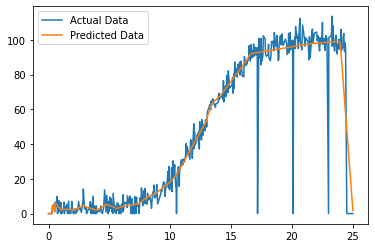

In [8]:
plt.plot(powerData[['speed']],powerData[['power']], label='Actual Data') 
plt.plot(powerData[['speed']],model.predict(powerData[['speed']]), 
label='Predicted Data') 
plt.legend(); 
plt.show();

#### References 
- Keras Models - https://keras.io/guides/sequential_model/


- Keras Optimizers - https://keras.io/api/optimizers/


- Tensorflow Load CSV- https://www.tensorflow.org/tutorials/load_data/csv


- Tensorflow Model Functions - https://www.tensorflow.org/api_docs/python/tf/keras/models#functions


- Lab Videos - https://learnonline.gmit.ie/course/view.php?id=1122


- Activation Layers - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


- Wind Turbines - https://www.energy.gov/eere/wind/how-do-wind-turbines-work#:~:text=Wind%20turbines%20work%20on%20a,a%20generator%2C%20which%20creates%20electricity.